In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

PG_USER = 'mushroom-writer'
PG_PASSWORD = '481224v!'
PG_HOST = 'skoeb.ddns.net'
PG_PORT = '5432'
PG_DB = 'mushroom'
PG_URI = f"postgresql://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DB}"

In [2]:
# --- Download Table ---
engine = create_engine(PG_URI)

query = """SELECT * FROM dummy.sensor_readings"""
df = pd.read_sql(query, engine)

df.set_index(pd.DatetimeIndex(df['timestamp']), inplace=True)
df.drop('timestamp', axis='columns', inplace=True)

df.head()

,temperature,humidity,moisture_reading,moisture_pct
timestamp,,,,
2020-11-12 03:31:06.049406,21.0,56.0,1024.0,0.0000
2020-11-12 03:32:12.428790,22.0,54.0,665.0,57.5321
2020-11-12 03:33:19.074864,22.0,54.0,678.0,55.4487
2020-11-12 03:34:25.811816,22.0,54.0,675.0,55.9295
2020-11-12 03:35:32.627503,22.0,54.0,691.0,53.3654


In [3]:
# --- Clean up ---
df = df.resample('1T').mean()
df = df['2020-11-11':]
df = df.rolling(5).mean()
df = df.dropna(subset=['temperature','moisture_reading'])


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

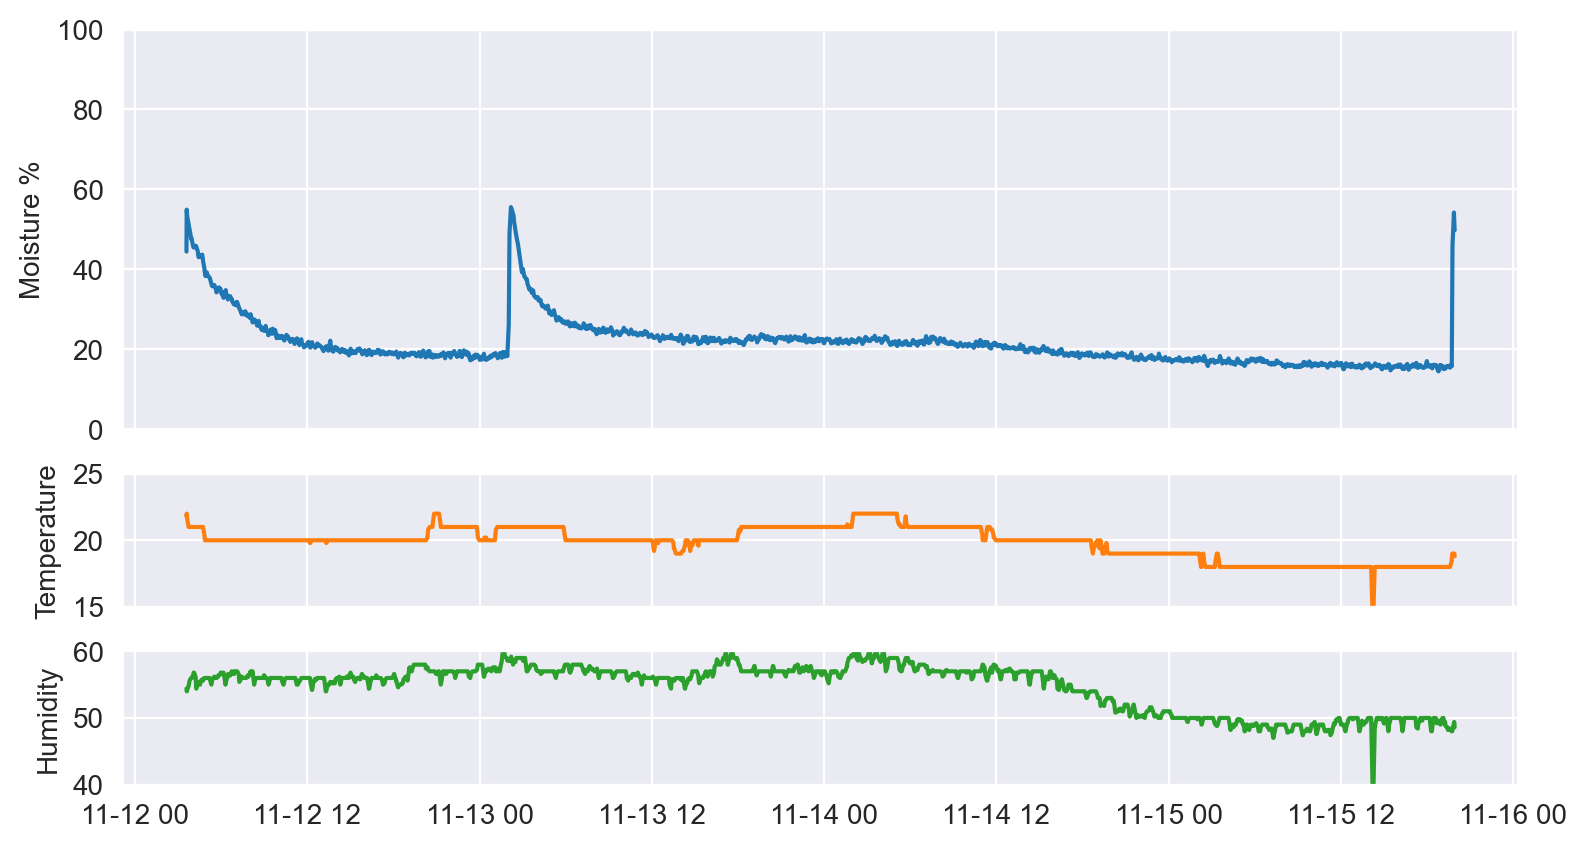

In [4]:
cp = sns.color_palette()
sns.set_style('darkgrid')

fig = plt.figure(figsize=(9,5), dpi=200)
gs = gridspec.GridSpec(3,1, height_ratios=[3,1,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1.plot(df.index, df['moisture_pct'],
           color=cp[0])
ax2.plot(df.index, df['temperature'],
           color=cp[1])
ax3.plot(df.index, df['humidity'],
           color=cp[2])

ax1.set_ylabel('Moisture %')
ax2.set_ylabel('Temperature')
ax3.set_ylabel('Humidity')

ax1.set_ylim(0,100)
ax2.set_ylim(15,25)
ax3.set_ylim(40,60)

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)